In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-19 00:06:38 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-19 00:06:38 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-19 00:06:38 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-19 00:06:40,701] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-19 00:06:40 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmp53qq2xq0/test.c -o /tmp/tmp53qq2xq0/test.o
2025-07-19 00:06:40 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmp53qq2xq0/test.o -laio -o /tmp/tmp53qq2xq0/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-19 00:06:41 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmppjbc2n85/test.c -o /tmp/tmppjbc2n85/test.o
2025-07-19 00:06:41 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmppjbc2n85/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmppjbc2n85/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-19 00:06:42 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-19 00:06:42 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-19 00:06:42 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-19 00:06:42 wandb.docker.auth DEBUG    No config file found


In [5]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [6]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-19 00:06:52 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-19 00:06:52 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-19 00:06:52 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-19 00:06:53 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-19 00:07:38 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-19 00:07:39 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [7]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [8]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-19 00:07:52 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])


2025-07-19 00:07:52 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-19 00:07:52 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-19 00:07:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-19 00:07:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-19 00:07:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-19 00:07:53 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-19 00:07:53 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-

In [9]:
# mt.tokenizer(
#     " " + "Brad Pitt", return_tensors="pt", add_special_tokens=False
# ).input_ids[0][0].item()

In [10]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)

2025-07-19 00:07:58 src.selection.data INFO     Loaded 16 categories


In [11]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

Ryan Reynolds -> Angelina Jolie (3): ['David Fincher', 'David Remnick', 'Maria Grazia Chiuri', 'Angelina Jolie', 'Chuck Schumer', 'David Baldacci']


[PredictedToken(token=' Angel', prob=0.6640625, logit=19.125, token_id=23950, metadata=None),
 PredictedToken(token=' David', prob=0.08984375, logit=17.125, token_id=6941, metadata=None),
 PredictedToken(token=' None', prob=0.04248046875, logit=16.375, token_id=2290, metadata=None),
 PredictedToken(token=' The', prob=0.04248046875, logit=16.375, token_id=578, metadata=None),
 PredictedToken(token=' Ryan', prob=0.032958984375, logit=16.125, token_id=13960, metadata=None)]

In [12]:
sample.detensorize()
with open("sample.json", "w") as f:
    json.dump(sample.to_dict(), f, indent=2)

In [13]:
with open("sample.json", "r") as f:
    data = json.load(f)

# print(type(data[]))
sample_ld = SelectionSample.from_dict(data)

In [14]:
# sample_ld.metadata["tokenized"]

In [15]:
list(people_by_category.keys())

['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

## Patching

### Testing

In [16]:
from src.functional import generate_with_patch
import random

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

# pivot_subj = "Celine Dion"
# entity_list = ["Ryan Reynolds", "Claude Monet", "Albert Einstein", "Taylor Swift", "Pablo Picasso", "Barack Obama", "J.K. Rowling", "Pierre Dubois"]

# pivot_subj = "Jim Henson"
# entity_list = [
#     "Celine Dion",
#     "Taylor Swift",
#     "Ryan Reynolds",
#     "Claude Monet",
#     "Albert Einstein",
#     "Pablo Picasso",
#     "Bil Baird",
#     "Barack Obama",
#     "J.K. Rowling",
#     "Pierre Dubois",
#     "Sachin Tendulkar",
#     "Hugh Jackman",
#     "Jackie Chan",
#     "Jet Li",
#     "Diego Maradona",
#     "Lionel Messi",
#     "Frida Kahlo",
#     "Diego Rivera",
# ]

# patch_subj = "Justin Trudeau"
# patch_obj = "Barack Obama"
# patch_obj_pos = 2
# patch_subj_distractor = "Emmanuel Macron"
# patch_obj, patch_subj_distractor = patch_subj_distractor, patch_obj

# patch_subj = "Hugh Jackman"
# patch_subj = "Carl Sagan"
# patch_subj = "Ricky Ponting"
# patch_subj = "George R. R. Martin"

# patch_subj = "Celine Dion"
# patch_obj = "Taylor Swift"
# patch_subj_distractor = "Adele Laurie Blue Adkins"

# patch_distractors = [
#     "Robin Hobb",
#     "Michael Jordan",
#     "Tom Cruise",
#     "Albert Einstein",
#     "Brian Lara",
# ]

######################################################################
patch_prof = "actor"
patch_obj_pos = 1
n_distractors = 5
######################################################################

# patch_subj = random.choice(people_by_prof_set[patch_prof].values)
# patch_obj = random.choice(
#     (people_by_prof_set[patch_prof] - KeyedSet([patch_subj])).values
# )
# patch_subj_distractor = random.choice(
#     (people_by_prof_set[patch_prof] - KeyedSet([patch_obj, patch_subj])).values
# )


# patch_distractors = []
# other_profs = random.choices(
#     list(set(people_by_prof.keys()) - {patch_prof}), k=n_distractors
# )

# for prof in other_profs:
#     patch_distractors.append(random.choice(people_by_prof[prof]))

# patch_list = (
#     patch_distractors[:patch_obj_pos] + [patch_obj] + patch_distractors[patch_obj_pos:]
# )
# obj_corrupt = get_first_token_id(patch_obj)
# print(f'{obj_corrupt=} >> "{mt.tokenizer.decode(obj_corrupt)}", {patch_obj=}')

# obj_patch_subj = get_first_token_id(patch_subj_distractor)
# print(f'{obj_patch_subj=} >> "{mt.tokenizer.decode(obj_patch_subj)}", {patch_subj_distractor=}')

# patch_prompt = prompt_template.format(patch_subj, ", ".join(patch_list))
# print(f'"{patch_prompt}"')

patch_sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=True,
    category=patch_prof,
    obj_idx=patch_obj_pos,
)

print(patch_sample)
print(patch_sample.prompt)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_sample.prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0]
print(f"{patch_gen}")

Denzel Washington -> Leonardo DiCaprio (1): ['Hillary Clinton', 'Leonardo DiCaprio', 'Casper Ruud', 'Bukayo Saka', 'Gabriel Iglesias', 'Shawn Mendes']
Which person from the following list has the profession in common with Denzel Washington?
Options: Hillary Clinton, Leonardo DiCaprio, Casper Ruud, Bukayo Saka, Gabriel Iglesias, Shawn Mendes.
Ans:


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


 Leonardo DiCaprio
Explanation: Denzel Washington is an actor. Leonardo DiCaprio is also an actor. Therefore, the person from the list


In [17]:
patch_sample.prediction

[PredictedToken(token=' Leonardo', prob=0.6484375, logit=19.625, token_id=66486, metadata=None),
 PredictedToken(token=' The', prob=0.1279296875, logit=18.0, token_id=578, metadata=None),
 PredictedToken(token=' Den', prob=0.09912109375, logit=17.75, token_id=9973, metadata=None),
 PredictedToken(token=' ', prob=0.0118408203125, logit=15.625, token_id=220, metadata=None),
 PredictedToken(token=' None', prob=0.0081787109375, logit=15.25, token_id=2290, metadata=None)]

In [18]:
from src.functional import get_hs, interpret_logits
from src.utils.typing import TokenizerOutput

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt = mt,
    input=TokenizerOutput(data = patch_sample.metadata["tokenized"]),
    locations=locations + [logit_location],
    return_dict=True
)

logit = patch_hs[logit_location]
pred = interpret_logits(
    logits = logit,
    tokenizer=mt
)
pred

[PredictedToken(token=' Leonardo', prob=0.6484375, logit=19.625, token_id=66486, metadata=None),
 PredictedToken(token=' The', prob=0.1279296875, logit=18.0, token_id=578, metadata=None),
 PredictedToken(token=' Den', prob=0.09912109375, logit=17.75, token_id=9973, metadata=None),
 PredictedToken(token=' ', prob=0.0118408203125, logit=15.625, token_id=220, metadata=None),
 PredictedToken(token=' None', prob=0.0081787109375, logit=15.25, token_id=2290, metadata=None)]

In [19]:
patch_sample.metadata["alt_obj"]

('Angelina Jolie', 23950)

In [20]:
##############################################################
clean_prof = "tennis player"
clean_obj_pos = 5
patch_type_pos = random.choice(
    list(set(list(range(0, n_distractors))) - {clean_obj_pos, patch_obj_pos})
)
##############################################################

clean_sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    category=clean_prof,
    obj_idx=clean_obj_pos,
    filter_by_lm_prediction=True,
    exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
    exclude_distractor_categories=[patch_prof, "singer"],
    insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
)

print(clean_sample)
print(clean_sample.prompt)
clean_sample.prediction

Stefanos Tsitsipas -> Petra Kvitová (5): ['Riccardo Tisci', 'Gervonta Davis', 'Angelina Jolie', 'Richard Branson', 'Stephen King', 'Petra Kvitová']
Which person from the following list has the profession in common with Stefanos Tsitsipas?
Options: Riccardo Tisci, Gervonta Davis, Angelina Jolie, Richard Branson, Stephen King, Petra Kvitová.
Ans:


[PredictedToken(token=' Petra', prob=0.86328125, logit=20.625, token_id=85037, metadata=None),
 PredictedToken(token=' Stefan', prob=0.033447265625, logit=17.375, token_id=50002, metadata=None),
 PredictedToken(token=' The', prob=0.026123046875, logit=17.125, token_id=578, metadata=None),
 PredictedToken(token=' None', prob=0.01397705078125, logit=16.5, token_id=2290, metadata=None),
 PredictedToken(token=' Ric', prob=0.0123291015625, logit=16.375, token_id=33652, metadata=None)]

In [21]:
from src.selection.utils import get_first_token_id

obj_corrupt = patch_sample.obj
obj_clean = clean_sample.obj
obj_pointer = clean_sample.options[patch_obj_pos]
obj_patch_type = patch_sample.metadata["alt_obj"][0]
obj_rand = random.choice(
    list(set(clean_sample.options) - {obj_clean, obj_pointer, obj_corrupt})
)

obj_track = {
    "corrupt": obj_corrupt,
    "clean": obj_clean,
    "pointer": obj_pointer,
    "patch_type": obj_patch_type,
    "rand": obj_rand,
    "none": "None"
}

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

{'corrupt': {'id': 66486, 'token': ' Leonardo', 'name': 'Leonardo DiCaprio'},
 'clean': {'id': 85037, 'token': ' Petra', 'name': 'Petra Kvitová'},
 'pointer': {'id': 480, 'token': ' G', 'name': 'Gervonta Davis'},
 'patch_type': {'id': 23950, 'token': ' Angel', 'name': 'Angelina Jolie'},
 'rand': {'id': 18587, 'token': ' Stephen', 'name': 'Stephen King'},
 'none': {'id': 2290, 'token': ' None', 'name': 'None'}}

In [22]:
from src.functional import PatchSpec

clean_tokenized = TokenizerOutput(
    data=clean_sample.metadata["tokenized"],
)

interested_tokens = [obj["id"] for obj in obj_track.values()]

patching_results = {}
for layer_name in mt.layer_names[::1]:
    int_logit = get_hs(
        mt = mt,
        input = clean_tokenized,
        patches = [PatchSpec(
            location=(layer_name, -1),
            patch=patch_hs[(layer_name, -1)],
            strategy="replace"
        )],
        locations = [logit_location],
        return_dict=False
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=interested_tokens,
    )
    patching_results[layer_name] = {
        "pred": pred,
        "track": track
    }
    print(f'{layer_name}: {[str(p) for p in pred]}, | track: {track}')

model.layers.0: ['" Petra"[85037] (p=0.852, logit=20.500)', '" Stefan"[50002] (p=0.037, logit=17.375)', '" The"[578] (p=0.029, logit=17.125)', '" None"[2290] (p=0.016, logit=16.500)', '" Ric"[33652] (p=0.014, logit=16.375)'], | track: {85037: (1, PredictedToken(token=' Petra', prob=0.8515625, logit=20.5, token_id=85037, metadata=None)), 2290: (4, PredictedToken(token=' None', prob=0.01556396484375, logit=16.5, token_id=2290, metadata=None)), 480: (6, PredictedToken(token=' G', prob=0.006103515625, logit=15.5625, token_id=480, metadata=None)), 18587: (8, PredictedToken(token=' Stephen', prob=0.0023956298828125, logit=14.625, token_id=18587, metadata=None)), 23950: (25, PredictedToken(token=' Angel', prob=0.000728607177734375, logit=13.4375, token_id=23950, metadata=None)), 66486: (2421, PredictedToken(token=' Leonardo', prob=3.557652235031128e-07, logit=5.8125, token_id=66486, metadata=None))}
model.layers.1: ['" Petra"[85037] (p=0.863, logit=20.625)', '" Stefan"[50002] (p=0.033, logit=

In [23]:
track

{66486: (1,
  PredictedToken(token=' Leonardo', prob=0.6484375, logit=19.625, token_id=66486, metadata=None)),
 2290: (5,
  PredictedToken(token=' None', prob=0.0081787109375, logit=15.25, token_id=2290, metadata=None)),
 480: (77,
  PredictedToken(token=' G', prob=0.00015926361083984375, logit=11.3125, token_id=480, metadata=None)),
 23950: (447,
  PredictedToken(token=' Angel', prob=6.973743438720703e-06, logit=8.1875, token_id=23950, metadata=None)),
 18587: (739,
  PredictedToken(token=' Stephen', prob=3.516674041748047e-06, logit=7.5, token_id=18587, metadata=None)),
 85037: (13703,
  PredictedToken(token=' Petra', prob=4.866160452365875e-08, logit=3.21875, token_id=85037, metadata=None))}

2025-07-19 00:08:19 matplotlib DEBUG    matplotlib data path: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data
2025-07-19 00:08:19 matplotlib DEBUG    CONFIGDIR=/disk/u/arnab/.config/matplotlib
2025-07-19 00:08:19 matplotlib DEBUG    interactive is False
2025-07-19 00:08:19 matplotlib DEBUG    platform is linux
2025-07-19 00:08:19 matplotlib DEBUG    CACHEDIR=/disk/u/arnab/.cache/matplotlib
2025-07-19 00:08:19 matplotlib.font_manager DEBUG    Using fontManager instance from /disk/u/arnab/.cache/matplotlib/fontlist-v390.json
2025-07-19 00:08:20 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-07-19 00:08:20 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-07-19 00:08:20 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-07-19 00:08:20 matplotlib.font

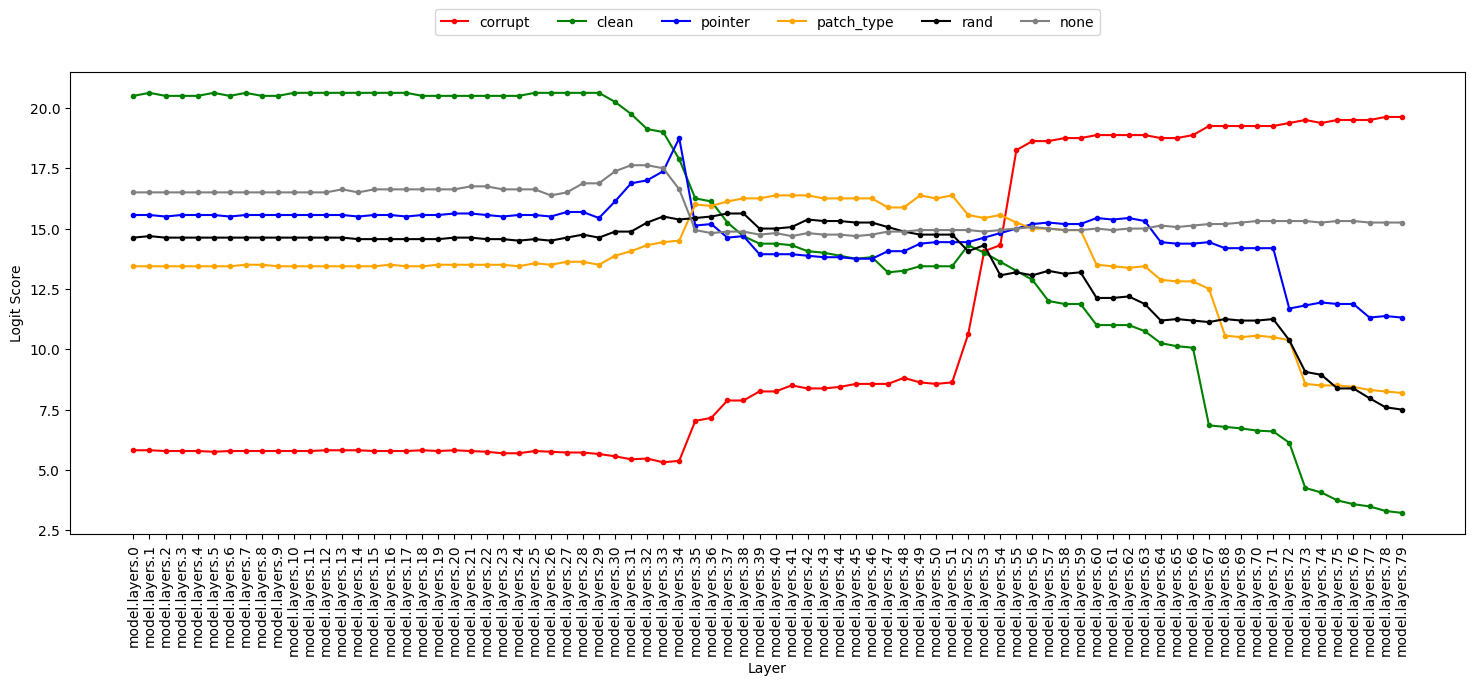

In [24]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "orange",
    "rand": "black",
    "none": "gray",
}

for layer_name, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [25]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult,
    ObjectwiseResult,
    LayerwiseResult,
)
from src.utils import experiment_utils

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 100
N_DISTRACTORS = 5
SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "last_token"
)

save_step = 50

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)
layer_step = 1
##################################################################################################

experiment_utils.set_seed(123456)

os.makedirs(SAVE_DIR, exist_ok=True)
run_idx = 0
patching_results = []

while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    # select the patch sample
    patch_prof = random.choice(list(people_by_category.keys()))
    patch_obj_pos = random.choice(list(range(N_DISTRACTORS)))
    logger.info(f"patch_prof={patch_prof}, patch_obj_pos={patch_obj_pos}")

    # TODO(arnab): Check accuracy with the object as well.
    patch_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=True,
        category=patch_prof,
        obj_idx=patch_obj_pos,
    )
    logger.info(f"patch_sample={str(patch_sample)}")
    logger.info(f"patch predictions={[str(pred) for pred in patch_sample.prediction]}")
    logger.info("-" * 50)

    # cache states
    patch_hs = get_hs(
        mt=mt,
        input=TokenizerOutput(data=patch_sample.metadata["tokenized"]),
        locations=locations,  # + [logit_location],
        return_dict=True,
    )

    # select the clean sample
    clean_prof = random.choice(list(set(people_by_category.keys()) - {patch_prof}))
    clean_obj_pos = random.choice(
        [idx for idx in range(N_DISTRACTORS) if idx != patch_obj_pos]
    )
    patch_type_pos = random.choice(
        list(set(list(range(0, N_DISTRACTORS))) - {clean_obj_pos, patch_obj_pos})
    )
    logger.info(f"clean_prof={clean_prof}, clean_obj_pos={clean_obj_pos}")

    logger.debug(
        f"patch_type_pos={patch_type_pos}, patch_obj_pos={patch_obj_pos}, clean_obj_pos={clean_obj_pos}"
    )

    clean_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=False,
        category=clean_prof,
        obj_idx=clean_obj_pos,
        filter_by_lm_prediction=True,
        exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
        exclude_distractor_categories=[patch_prof],
        insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
    )
    logger.info(f"clean_sample={str(clean_sample)}")
    logger.info(f"clean predictions={[str(pred) for pred in clean_sample.prediction]}")
    logger.info("-" * 50)

    # do the interventions
    clean_tokenized = TokenizerOutput(
        data=clean_sample.metadata["tokenized"],
    )

    obj_corrupt = patch_sample.obj
    obj_clean = clean_sample.obj
    obj_pointer = clean_sample.options[patch_obj_pos]
    obj_patch_type = patch_sample.metadata["alt_obj"][0]
    obj_rand = random.choice(
        list(set(clean_sample.options) - {obj_clean, obj_pointer, obj_corrupt, obj_patch_type})
    )

    obj_track = {
        "corrupt": obj_corrupt,
        "clean": obj_clean,
        "pointer": obj_pointer,
        "patch_type": obj_patch_type,
        "rand": obj_rand,
        "none": "None",
    }

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    interested_tokens = [obj["id"] for obj in obj_track.values()]

    layerwise_patching_results = {}
    for layer_name in mt.layer_names[::1]:
        int_logit = get_hs(
            mt=mt,
            input=clean_tokenized,
            patches=[
                PatchSpec(
                    location=(layer_name, -1),
                    patch=patch_hs[(layer_name, -1)],
                    strategy="replace",
                )
            ],
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=interested_tokens,
        )
        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[layer_name] = LayerwiseResult(
            predictions=pred, objs=objectwise_result
        )
        # print(f"{layer_name}: {[str(p) for p in pred]} | track: {track}")

    patch_sample.detensorize()
    clean_sample.detensorize()
    
    patching_results.append(
        SelectionPatchingResult(
            patch_sample=patch_sample,
            clean_sample=clean_sample,
            results=layerwise_patching_results,
        )
    )

    if run_idx % save_step == 0 or run_idx == N_RUNS:
        save_file = os.path.join(
            SAVE_DIR,
            f"patching_results.json",
        )

        with open(save_file, "w") as f:
            json.dump(
                [run.to_dict() for run in patching_results],
                f,
                indent=2,
            )


    logger.info("#" * 100)

2025-07-19 00:08:21 src.utils.experiment_utils INFO     setting all seeds to 123456
2025-07-19 00:08:21 __main__ INFO     ####################################################################################################
2025-07-19 00:08:21 __main__ INFO     Run 1/100
2025-07-19 00:08:21 __main__ INFO     patch_prof=boxer, patch_obj_pos=0
2025-07-19 00:08:21 __main__ INFO     patch_sample=Gervonta Davis -> Caleb Plant (0): ['Caleb Plant', 'Scarlett Johansson', 'Glenn Greenwald', 'Shane Lowry', 'Jim Carrey', 'Simona Halep']
2025-07-19 00:08:21 __main__ INFO     patch predictions=['" Caleb"[84162] (p=0.832, logit=20.500)', '" G"[480] (p=0.047, logit=17.625)', '" The"[578] (p=0.037, logit=17.375)', '" None"[2290] (p=0.022, logit=16.875)', '" C"[356] (p=0.005, logit=15.312)']
2025-07-19 00:08:21 __main__ INFO     --------------------------------------------------
2025-07-19 00:08:21 __main__ INFO     clean_prof=director, clean_obj_pos=3
2025-07-19 00:08:21 __main__ DEBUG    patch_type_po

In [34]:
patching_results[1].results[mt.layer_name_format.format(5)].objs

{'corrupt': ObjectwiseResult(rank=574, pred=PredictedToken(token=' Paul', prob=4.976987838745117e-06, logit=7.875, token_id=7043, metadata=None)),
 'clean': ObjectwiseResult(rank=1, pred=PredictedToken(token=' Ole', prob=0.6328125, logit=19.625, token_id=33797, metadata=None)),
 'pointer': ObjectwiseResult(rank=236, pred=PredictedToken(token=' Nora', prob=1.9669532775878906e-05, logit=9.25, token_id=73645, metadata=None)),
 'patch_type': ObjectwiseResult(rank=31, pred=PredictedToken(token=' James', prob=0.000835418701171875, logit=13.0, token_id=7957, metadata=None)),
 'rand': ObjectwiseResult(rank=70, pred=PredictedToken(token=' Kevin', prob=0.000186920166015625, logit=11.5, token_id=16768, metadata=None)),
 'none': ObjectwiseResult(rank=8, pred=PredictedToken(token=' None', prob=0.005126953125, logit=14.8125, token_id=2290, metadata=None))}

In [35]:
print(patch_sample.prompt)

Which person from the following list has the profession in common with Paulo Dybala?
Options: Neymar, Gervonta Davis, Bruno Mars, Jack Ma, Robin Roberts, Scarlett Johansson.
Ans:


In [36]:
# run = patching_results[1]
# run.clean_sample.detensorize()
# run.patch_sample.detensorize()
# with open("run.json", "w") as f:
#     json.dump(run.to_dict(), f, indent=2)

In [37]:
# with open("run.json", "r") as f:
#     run_data = json.load(f)
# run_ld = SelectionPatchingResult.from_dict(run_data)

In [38]:
# for run in patching_results:
#     run.clean_sample.detensorize()
#     run.patch_sample.detensorize()

# with open("patching_results.json", "w") as f:
#     json.dump(
#         [run.to_dict() for run in patching_results],
#         f,
#         indent=2,
#     )

In [39]:
from src.selection.data import SelectionPatchingResult


SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "last_token"
)


with open(os.path.join(SAVE_DIR, "patching_results.json"), "r") as f:
    patching_results_ld = json.load(f)
patching_results_ld = [
    SelectionPatchingResult.from_dict(run) for run in patching_results_ld
]
len(patching_results_ld)

100

In [40]:
#######################################################
patching_results = patching_results_ld
N_RUNS = len(patching_results)
#######################################################

2025-07-19 00:39:17 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-19 00:39:17 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-19 00:39:17 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-19 00:39:17 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-19 00:39:17 matplotlib.category INFO

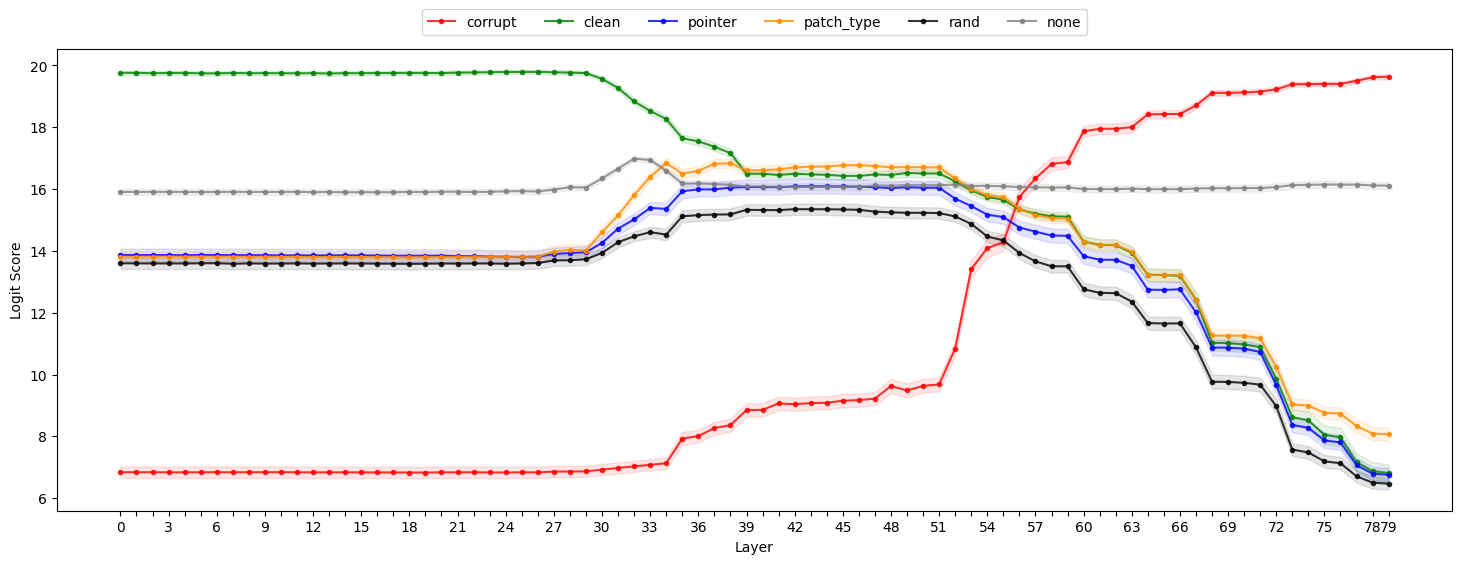

In [ ]:
from matplotlib import pyplot as plt

##############################################
METRIC = "logit"
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "#FF4500",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results[0].results.keys())
x_keys = [key.split(".")[-1] for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_name, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.8,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=0)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.10))

plt.show()

## Testing with Synthetic Entities

In [ ]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    # obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

In [ ]:
from src.functional import generate_with_patch

synth_entity = "Ali Rezaei"
# synth_entity = "Takeshi Yamamoto"

prompts = [
    "{} is by profession a",
]

for prompt in prompts:
    gen = generate_with_patch(
        mt = mt,
        inputs = prompt.format(synth_entity),
        n_gen_per_prompt=1,
        remove_prefix=True,
        do_sample=False,
    )[0]
    print(f"{prompt.format(synth_entity)} >> {gen}")

In [ ]:
sample.options[sample.obj_idx] = synth_entity
print(sample.prompt)

In [ ]:
generate_with_patch(
    mt = mt,
    inputs = sample.prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

## Get subspace

In [ ]:
selection_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, "selection", mt.name.split("/")[-1], "profession"
)

cached_states_dir = cache_dir = os.path.join(selection_dir, "cached_states")
len(os.listdir(cached_states_dir))

In [ ]:
import numpy as np

# LIMIT = 150
LIMIT = len(os.listdir(cached_states_dir))

cached_states = {}

for sample_idx in range(LIMIT):
    cache_file_path = os.path.join(cached_states_dir, f"sample_{sample_idx}.json")
    sample_states = np.load(os.path.join(cache_dir, "sample_0.npz"), allow_pickle=True)
    states = {
        layer_name: torch.Tensor(value).to(mt.device)
        for layer_name, value in sample_states["states"].item().items()
    }

    for layer_name in states:
        if layer_name not in cached_states:
            cached_states[layer_name] = []
        cached_states[layer_name].append(states[layer_name])

cached_states = {
    layer_name: torch.stack(cached_states[layer_name], dim=0).to(mt.dtype).to(mt.device)
    for layer_name in cached_states 
}

free_gpu_cache()

In [ ]:
for key in cached_states:
    print(f"{key}: {cached_states[key].shape}")

In [ ]:
from src.functional import get_module_nnsight

def apply_patch_with_projection(
    mt,
    clean_prompts,
    patch_prompts,
    projections,
    token_idx = -1,
):
    
    with mt.trace() as tracer:

        # cache states for patching
        patch_hs = {}
        with tracer.invoke(patch_prompts):
            for layer_name in projections:
                module = get_module_nnsight(mt, layer_name)
                current_states = (
                    module.output
                    if ("mlp" in layer_name or layer_name == mt.embedder_name)
                    else module.output[0]
                )
                patch_hs[layer_name] = current_states[:, token_idx, :].detach().clone()
        
        # apply the patch
        with tracer.invoke(clean_prompts):
            for layer_name in projections:
                module = get_module_nnsight(mt, layer_name)
                current_states = (
                    module.output
                    if ("mlp" in layer_name or layer_name == mt.embedder_name)
                    else module.output[0]
                )
                clean_h = current_states[:, token_idx, :].detach().clone()
                # apply the projection
                patch_proj = torch.matmul(patch_hs[layer_name], projections[layer_name])
                clean_proj = torch.matmul(clean_h, projections[layer_name])
                current_states[:, token_idx, :] = clean_h - clean_proj + patch_proj
                # current_states[:, token_idx, :] = patch_hs[layer_name]
            
            # get the logits after the intervention
            logits = mt.lm_head.output[:, -1].detach().save()

    return logits

In [ ]:
from src.utils.typing import SVD

layer_names = [
    # mt.layer_name_format.format(42),
    # mt.layer_name_format.format(43),
    mt.layer_name_format.format(45),
]

basis_directions = {}

for layer_name in layer_names:
    svd = SVD.calculate(cached_states[layer_name])
    basis_directions[layer_name] = svd.Vh.t().to(mt.dtype).to(mt.device)

In [ ]:
from torch.optim import Adam

#####################################################################
learning_rate = 1e-3
#####################################################################

n_dim = mt.n_embd
masks = {
    layer_name: torch.ones(n_dim, dtype=mt.dtype, device=mt.device)
    for layer_name in layer_names
}

#TODO(arnab): setup optimizer and stuff
optimizer = Adam(masks.values(), lr=learning_rate)
#TODO(arnab): setup optimizer and stuff

projections = {}
for layer_name in layer_names:
    mask = masks[layer_name]
    basis_direction = basis_directions[layer_name]
    masked_directions = basis_direction * mask[:, None]
    # V directions are row-wise
    projections[layer_name] = masked_directions.t() @ masked_directions

In [ ]:
projections[layer_names[0]].dtype

In [ ]:
with open(os.path.join(SAVE_DIR, "patching_results.json"), "r") as f:
    patching_results_ld = json.load(f)

clean_samples = []
patch_samples = []

for run in patching_results_ld:
    clean_samples.append(SelectionSample.from_dict(run["clean_sample"]))
    patch_samples.append(SelectionSample.from_dict(run["patch_sample"]))

len(clean_samples), len(patch_samples)

In [ ]:
from typing import Literal

batch_size = 4

target_obj: Literal["pointer", "patch_type"] = "pointer"

targets = []
patch_prompts = []
clean_prompts = []

for clean_sample, patch_sample in zip(clean_samples[:batch_size], patch_samples[:batch_size]):
    objs = {
        "pointer": clean_sample.options[patch_sample.obj_idx],
        "patch_type": patch_sample.metadata["alt_obj"][0]
    }
    print(patch_sample)
    print(clean_sample)
    print(objs)

    print("-" * 50)

    targets.append(get_first_token_id(objs[target_obj], mt.tokenizer, prefix=" "))
    patch_prompts.append(patch_sample.prompt)
    clean_prompts.append(clean_sample.prompt)

In [ ]:
from src.tokens import prepare_input

for tok in targets:
    print(f'{tok} >> "{mt.tokenizer.decode(tok)}"')

clean_tokenized = prepare_input(prompts=clean_prompts, tokenizer = mt)
patch_tokenized = prepare_input(prompts=patch_prompts, tokenizer = mt)

clean_tokenized.input_ids.shape, patch_tokenized.input_ids.shape

In [ ]:
logits = apply_patch_with_projection(
    mt=mt,
    clean_prompts=clean_prompts,
    patch_prompts=patch_prompts,
    projections=projections,
    token_idx=-1,
)   

logits.shape

In [ ]:
from src.functional import interpret_logits
for logit in logits:
    pred = interpret_logits(tokenizer=mt, logits = logit)
    print([f"{str(p)}" for p in pred])

In [ ]:
target_logits = [logit[tok] for logit, tok in zip(logits, targets)]

In [ ]:
torch.stack(target_logits).mean()

In [ ]:
def get_optimal_projection(
    mt: ModelandTokenizer,
    clean_prompts: list[str],
    patch_prompts: list[str],
    target_tokens: list[int],
    basis_directions: dict[str, torch.Tensor],
    learning_rate: float = 1e-2,
    n_epochs: int = 5,
    lamb=1e-5,
    batch_size: int = 4,
):
    masks = {
        layer_name: torch.ones(
            mt.n_embd, dtype=mt.dtype, device=mt.device, requires_grad=True
        )
        for layer_name in basis_directions.keys()
    }
    optimizer = Adam(masks.values(), lr=learning_rate)

    losses = []
    for epoch in range(n_epochs):
        epoch_loss = 0

        for batch_idx, batch_st in enumerate(range(0, len(clean_prompts), batch_size)):
            batch_clean = clean_prompts[batch_st : batch_st + batch_size]
            batch_patch = patch_prompts[batch_st : batch_st + batch_size]
            batch_targets = target_tokens[batch_st : batch_st + batch_size]

            clean_tokenized = prepare_input(prompts=batch_clean, tokenizer=mt)
            patch_tokenized = prepare_input(prompts=batch_patch, tokenizer=mt)

            projections = {}
            for layer_name in basis_directions.keys():
                mask = masks[layer_name]
                basis_direction = basis_directions[layer_name]
                masked_directions = basis_direction * mask[:, None]
                # V directions are row-wise
                projections[layer_name] = masked_directions.t() @ masked_directions

            logits = apply_patch_with_projection(
                mt=mt,
                clean_prompts=clean_tokenized,
                patch_prompts=patch_tokenized,
                projections=projections,
                token_idx=-1,
            )

            # calculate loss
            target_logits = [logit[tok] for logit, tok in zip(logits, batch_targets)]
            target_loss = -torch.stack(target_logits).mean()  # need this to go up

            mask_l1_loss = 0
            for mask in masks.values():
                mask_l1_loss += lamb * mask.norm(p=1)

            loss = target_loss + mask_l1_loss.to(target_loss.device)
            logger.debug(f"{batch_idx} >> {target_loss} + {mask_l1_loss} = {loss}")

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # clamp the masks to [0, 1] after optimization step
            with torch.no_grad():
                for mask in masks.values():
                    mask.clamp_(0, 1)

            epoch_loss += loss.item()
            losses.append(loss.item())

        logger.debug(
            f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss / len(clean_prompts)}"
        )

    # build projections
    final_projections = {}
    metadata = {
        "losses": losses,
        "masks": {k: v.detach().clone() for k, v in masks.items()},
    }
    for layer_name in basis_directions.keys():
        mask = masks[layer_name]
        basis_direction = basis_directions[layer_name]
        masked_directions = basis_direction * mask[:, None]
        # V directions are row-wise
        final_projections[layer_name] = masked_directions.t() @ masked_directions

    return final_projections, metadata

In [ ]:
target_obj: Literal["pointer", "patch_type"] = "pointer"

targets = []
patch_prompts = []
clean_prompts = []

for clean_sample, patch_sample in zip(clean_samples, patch_samples):
    objs = {
        "pointer": clean_sample.options[patch_sample.obj_idx],
        "patch_type": patch_sample.metadata["alt_obj"][0]
    }
    # print(patch_sample)
    # print(clean_sample)
    # print(objs)
    # print("-" * 50)

    targets.append(get_first_token_id(objs[target_obj], mt.tokenizer, prefix=" "))
    patch_prompts.append(patch_sample.prompt)
    clean_prompts.append(clean_sample.prompt)

len(targets), len(patch_prompts), len(clean_prompts)

In [ ]:
projections, metadata = get_optimal_projection(
    mt=mt,
    clean_prompts=clean_prompts,
    patch_prompts=patch_prompts,
    target_tokens=targets,
    basis_directions=basis_directions,
    lamb=1e-3,
    learning_rate=1e-2,
)

In [ ]:
plt.plot(metadata["losses"])

In [ ]:
free_gpu_cache()